The given dataet needs to be analysed, review, visualise for us to be able to apply our machine learnign algorithm to enable us make prediction effectively as requested. The first step in developing the required model for prediction is by importing all libraries that will be required. 

## IMPORTING LIBRARIES 

In [77]:
#LIBRARIES FOR DATA ANALYSIS AND WRANGLING

import pandas as pd
import numpy as np
import random as rnd

# LIBRARIES FOR VISUALIZATION

import seaborn as sns
import matplotlib.pyplot as plt

# LIBRARIES FOR MODELLING AND PREDICTION 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import datasets

## READING IN DATA

In [78]:
traindf = pd.read_csv('/kaggle/input/ttsets/Titanic_train (1).csv')
testdf = pd.read_csv('/kaggle/input/ttsets/Titanic_test (1).csv')
tts = pd.read_csv('/kaggle/input/ttsets/Titanic_test_Suvived.csv')

## VIEWING THE DATASET AND MANIPULATING THE DATASET

In [79]:
##viewing the train dataset loaded

traindf.shape, testdf.shape
traindf.info()
testdf.info()
traindf 
testdf


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Here we can see that,  the titanic train dataset has 891 rows and 12 columns while the titanic test dataset has 418 rows and 11 columns which shows that the entire data set has 1309 observations and the training dataset constitute about 68.1% of the entire data and this confirms with the general rule of Machine Learning which postulate that the test data should consitute a larger percentage of the total dataset. 

It can also be reviewed herein that the survived column is our target variable for which we are looking to model and predict. Hence the need for the absence of the survived column in the test data

In [80]:
#first glance of the correlation of the features(variables) in the training data 

traindf.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


From the first glance on the correlation, we could deduce that some features have some correlation with the survived feature and thus will be a determinant in our prediction, this can be better respresent with the below visualisation 

<AxesSubplot:>

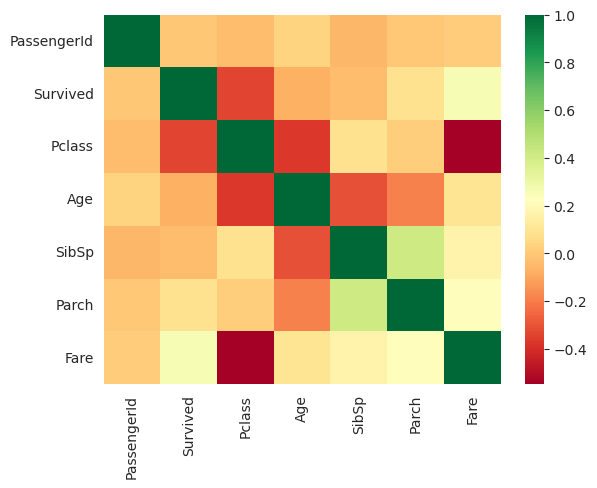

In [81]:
sns.heatmap(traindf.corr(), cmap = 'RdYlGn')

This shows that the Pclass,Age are somewhat correllated(negatively) and the Fare is positively correlated with the Survived features and this shows that these set of features will be a significant factor in our prediction model. Also note, that the correlation done above are for numerical data type feautres as correlation can only performed on numerical data type. Hence we might need to convert some categorical data type features such as sex, embarked to numerical data type features to be able to analyse the importance of it to the prediction model. We might also need to create some variables such as title to see the relationship it is perceived to hold with the pclass and ultimately with the survival. 

Before we go further we need to analyse and determine the missing value in our dataset and look to work or resolve this missing values with respect to the features it exist in and the importance of that features to our prediction model. 

In [82]:
##Determining the null values in our train data 
traindf.isnull().sum().sort_values(ascending= False)
#df_train

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

The Above shows that three feautures (Age, Cabin and Embarked) consist of missing values with varying degree of missing values and Cabin having the highest volume of missing values. Now we try to remove/replace the missing value in the dataset. 

Cabin: I am opting to remove the cabin dataset due to the large volume of missing values in the features and also with the fact that it is assumes not to be significantly important in our model prediction. 

Age: The missing value in Age will be replaced by the mean value of the Age features, this option was opted for due to the perceived signifance of the Age feature to our prediction model and also the relative volume of the missing values. 

Embarked: The Embarked features is also perceived to be siginificantly important to the prediction model and as such, the missing value in the features will be filled, replaced by the most frequent value (Mode). 

In [83]:
##removing the null value in the cabin column 
traindf1 = traindf.drop('Cabin', axis=1)
traindf1
traindf1.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

it can be seen that the Cabin column has been succesfully dropped and the new values of the data has been assigned to traindf1 

Before filling the missing value in the Age and Embarked features with the mean and the mode respectively as earlier stated, we first need to consider the basic statistical analysis of the dataset to determine the mean and the mode. 

In [84]:
traindf1.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


In [85]:
#Filling the missing values in the Age features using the fillna function. 
# The mean value for the Age as shown above is 29.6999
traindf1.fillna({'Age': 29.69}, inplace = True)
traindf1.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

The Age Feature has now been filled with the mean value and the original has been replaced with the inplace function. we will now complete the dealing with missing values process by filling the embarked with the mode(most frequent value) 

In [86]:
##using the fillna function to fill in the null values in embarked column using the mode 

traindf1['Embarked'].fillna(traindf1['Embarked'].mode()[0], inplace = True)
traindf1.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [87]:
traindf1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.69,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C


Here we can see that our Training dataset do not have any missing values anymore as all missing values have been dealt with. 

We will apply the same process to the Test Data set 

## Applying the same cleaning process to the test dataset

In [88]:
# understanding the missing values in the test dataset. 
testdf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

This shows that only two features ( Cabin, Age and Fare) have missing values in the test dataset and as such, we will use the same principle applied in the training dataset by removing the Cabin column and filling the Age Column with the mean value, the Fare features will be filled with the mode(frequent value) 

In [89]:
testdf1 = testdf.drop('Cabin', axis=1)
testdf1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [90]:
#Getting the statiscal analysis of the test dataset 

testdf1.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN


In [91]:
#Filling the missing values in the Age features using the fillna function. 
# The mean value for the Age as shown above is 30.272

testdf1.fillna({'Age': 30.27}, inplace = True)
testdf1.isnull().sum() 

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [92]:
##using the fillna function to fill in the null values in Fare column using the mode 

testdf1['Fare'].fillna(testdf1['Fare'].mode()[0], inplace = True)
testdf1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

From the above, we can see now that the test dataset also has been cleared of missing values and such ready for further analysis. 

In [93]:
testdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


## FURTHER VISUALISATION OF THE TRAIN DATASET AFTER DEALING WITH THE MISSING VALUES  

<AxesSubplot:xlabel='Survived', ylabel='count'>

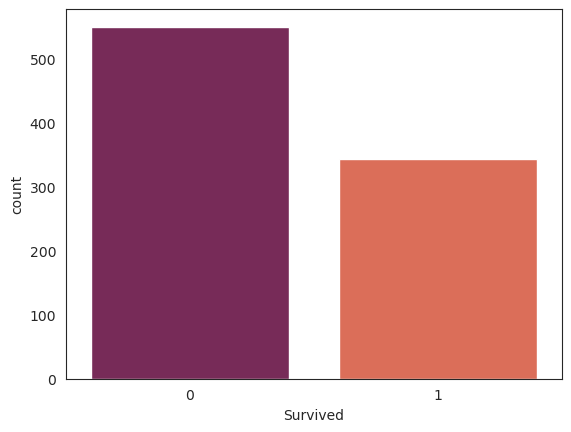

In [94]:
sns.set_style('white')
sns.countplot(traindf1, x = 'Survived', palette = 'rocket')

This shows that in the traindata sets, more 

In [1]:
sns.set_style('dark')
sns.countplot(traindf1, x = 'Survived' , hue = 'Pclass').set(title='Title of Plot')

NameError: name 'sns' is not defined

<AxesSubplot:xlabel='Pclass', ylabel='count'>

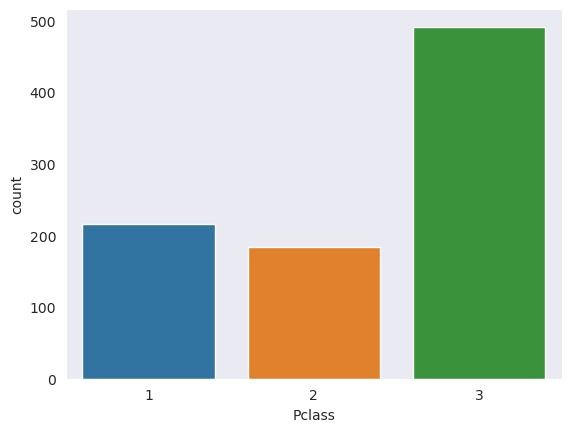

In [96]:
sns.set_style('dark')
sns.countplot(traindf1, x = 'Pclass')

With the visualization above, it can be said that the survival rate is dependent on the type of class you are , which furhter solidify our earlier claim that there is a relationship between the Pcass and Survived features. It shows that the passengers classified as 3rd Class are less likely to survive and 1st Class passengers are more likely to survive. 

We will go furhter to analyse the relationship with respect to Sex and Age 

<AxesSubplot:xlabel='Survived', ylabel='count'>

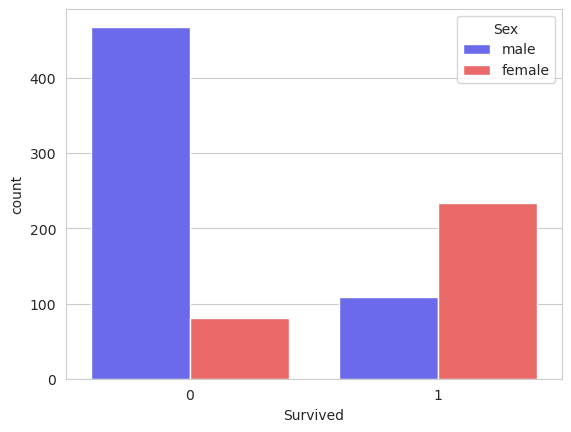

In [97]:
sns.set_style('whitegrid')
sns.countplot(traindf1, x = 'Survived', hue = 'Sex', palette = 'seismic')

Again, the visuals above shows the Sex is an important features as male passengers are less likely to survive and the females are more likely to survive. Less than 100 Females did not survive and almost 500 Male did not survive. 

<AxesSubplot:>

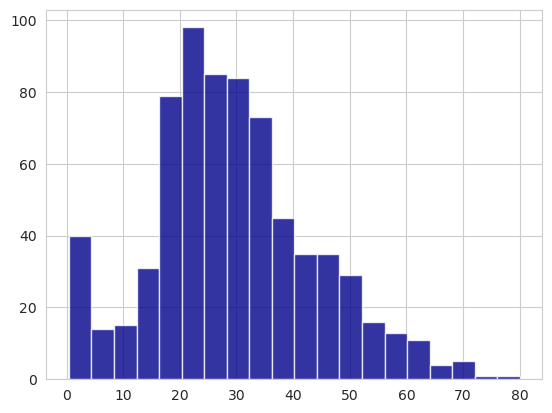

In [98]:
traindf['Age'].hist(bins = 20 , color = 'Darkblue', alpha = 0.8)

<AxesSubplot:>

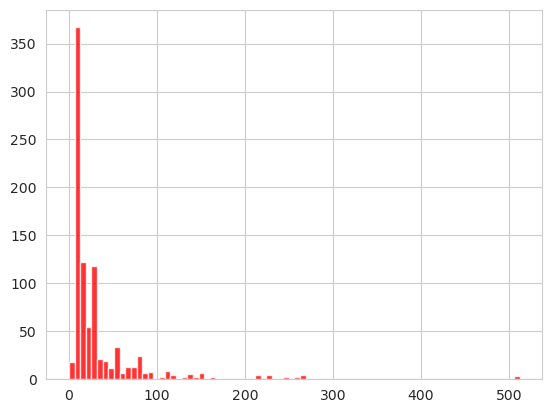

In [99]:
traindf['Fare'].hist(bins = 80 , color = 'Red', alpha = 0.8 )


Here we are looking at the distribution of the Age column and it can be seen that it follows a normal distribution and that the Average Age is between 20 and 30 and that there are more younger people in the dataset

<AxesSubplot:xlabel='SibSp', ylabel='count'>

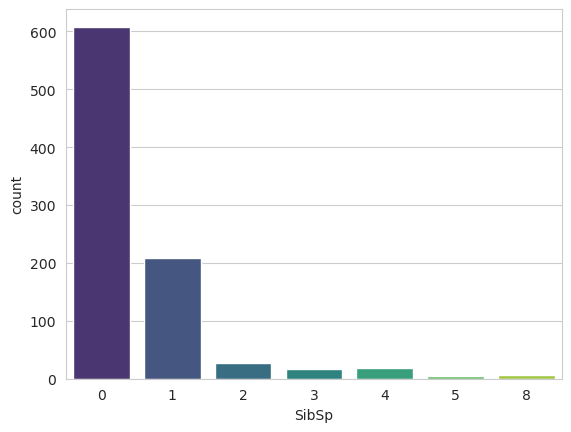

In [100]:
sns.set_style('whitegrid')
sns.countplot(traindf1, x = 'SibSp', palette = 'viridis')

<AxesSubplot:xlabel='Parch', ylabel='count'>

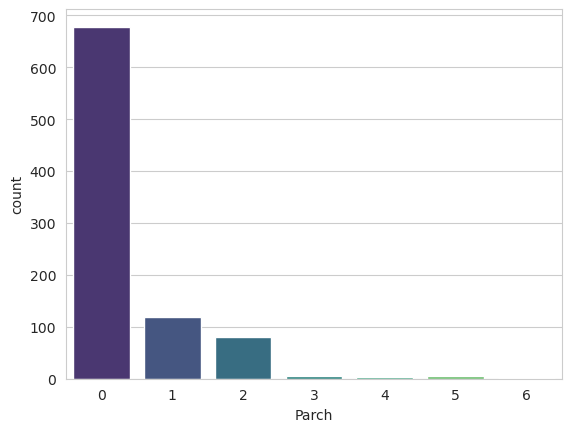

In [101]:
sns.set_style('whitegrid')
sns.countplot(traindf1, x = 'Parch', palette = 'viridis')

The Plot above shows the count of passengers with Siblings and Spouse, which shows that more passengers travelled alone or with atleast one, this assumption need to be correlated with the Parch Features to ascertain the count of passengers that travel alone. 

To do this, we need to create a new feature 'Family' from the existing feature of 'SibSp' and 'Parch'by combining the two features for each observation. This should be done on both the Train dataset and the Test dataset, to achieve this, the two dataset can be combined together first. 

In [102]:
# Comining the training and test dataset 

Titanic_data = [traindf1, testdf1] 

# Creating the new Feature 'Family' 

for Titanicdata in Titanic_data:
    Titanicdata['Family'] = Titanicdata ['SibSp'] + Titanicdata['Parch'] + 1 

#traindf1['Family'].head(20)
#traindf1.head(10)
testdf1.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S,3


A snap shot of the first 20 observation in the Family feature just created shows that some of the passengers did not travel alone and as such this might be a significant factor to the survival of the passenger. However the Family feature is not quite set up to be used for model, therefore we can create additional feature that recognises the passenger that are alone or not as a binary feature of 0 and 1 


In [103]:
# Refer to the combined data set to create a new feature 
#creating binary values to know if passengers travelled alone or not.

# Creating the new feature 'Alone'

for Titanicdata in Titanic_data:
    Titanicdata['Alone'] = 0 
    Titanicdata. loc[Titanicdata['Family'] == 1, 'Alone'] = 1
    
traindf1['Alone'].head(20)

traindf1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S,1,1
5,6,0,3,"Moran, Mr. James",male,29.69,0,0,330877,8.4583,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,S,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,C,2,0


****

Now we have Alone Feature created that we can use to correlate with the Survived feature. With the new Feature we can successfully drop the Parch, Sibsp and Family features as this as all being combine into the Alone feature. The drop will be applied on the earlier created combine data such that the effect is applied on both the  

In [104]:
testdf1 = testdf1.drop(['Family', 'SibSp', 'Parch'], axis = 1)
traindf1 = traindf1.drop(['Family', 'SibSp', 'Parch'], axis = 1)

testdf1
traindf1


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.69,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,111369,30.0000,C,1


Visualising the Alone feature against the survived feature and see the count 

Alone = 0 means passengers are not travelling alone 

Alone = 1 means passengers are travelling alone 

The below visuals shows that the large count of the passengers are travelling alone. 


<AxesSubplot:xlabel='Alone', ylabel='count'>

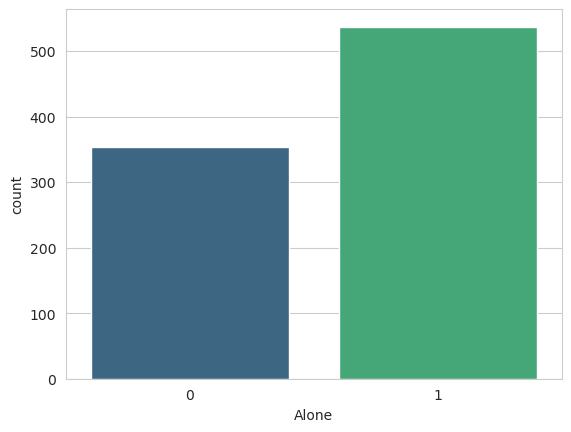

In [105]:
sns.set_style('whitegrid')
sns.countplot(traindf1, x = 'Alone', palette = 'viridis')

## CONVERTING CATEGORICAL DATA INTO NUMERICAL 

There is a greater need to look the Categorical features such as 'Sex', Embarked and Name and check if there is any need for this features and convert it to numerical features if needed. Typically, 

Sex has only 2 categories (Male and Female) 

Embarked has 3 categories  (S, C, Q) 

This 2 features needs to be considered and as such converted to a numeric data type features. 


In [106]:
# Converting Sex and Embarked Features into Numeric features using Pandas

Embarked = pd.get_dummies(traindf1['Embarked'])
Sex= pd.get_dummies(traindf1['Sex'])

traindf2 = pd.concat([traindf1, Sex, Embarked], axis = 1)

traindf2 


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Alone,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,A/5 21171,7.2500,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,PC 17599,71.2833,C,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,STON/O2. 3101282,7.9250,S,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,113803,53.1000,S,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00,373450,8.0500,S,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,211536,13.0000,S,1,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,112053,30.0000,S,1,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.69,W./C. 6607,23.4500,S,0,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,111369,30.0000,C,1,0,1,1,0,0


Repeating the same process for the Test Dataset so as to align with the Train Data for accurate prediction

In [107]:
# Converting Sex and Embarked Features into Numeric features using Pandas

Embarked = pd.get_dummies(testdf1['Embarked'])
Sex= pd.get_dummies(testdf1['Sex'])

testdf2 = pd.concat([testdf1, Sex, Embarked], axis = 1)

testdf2 

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Alone,female,male,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.50,330911,7.8292,Q,1,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,363272,7.0000,S,0,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,240276,9.6875,Q,1,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.00,315154,8.6625,S,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,3101298,12.2875,S,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27,A.5. 3236,8.0500,S,1,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,PC 17758,108.9000,C,1,1,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,SOTON/O.Q. 3101262,7.2500,S,1,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,30.27,359309,8.0500,S,1,0,1,0,0,1


## DROPPING THE NON-SIGNIFICANT FEATURES

In [116]:
# Dropping the 'Name', 'Sex', 'Embarked', 'Ticket' features 

traindf2.drop(['Sex', 'Embarked','Name', 'Ticket'], axis = 1 , inplace = True)

traindf2.head(10)
#traindf2.shape

,Survived,Pclass,Age,Fare,Alone,female,male,C,Q,S
0,0,3,22.00,7.2500,0,0,1,0,0,1
1,1,1,38.00,71.2833,0,1,0,1,0,0
2,1,3,26.00,7.9250,1,1,0,0,0,1
3,1,1,35.00,53.1000,0,1,0,0,0,1
4,0,3,35.00,8.0500,1,0,1,0,0,1
5,0,3,29.69,8.4583,1,0,1,0,1,0
6,0,1,54.00,51.8625,1,0,1,0,0,1
7,0,3,2.00,21.0750,0,0,1,0,0,1
8,1,3,27.00,11.1333,0,1,0,0,0,1
9,1,2,14.00,30.0708,0,1,0,1,0,0


Repeating the same process for the Test dataset

In [121]:
#testdf2.drop(['Sex', 'Embarked','Name', 'Ticket'], axis = 1, inplace = True)

testdf2.head(10)
#testdf2.shape


,Pclass,Age,Fare,Alone,female,male,C,Q,S
0,3,34.5,7.8292,1,0,1,0,1,0
1,3,47.0,7.0000,0,1,0,0,0,1
2,2,62.0,9.6875,1,0,1,0,1,0
3,3,27.0,8.6625,1,0,1,0,0,1
4,3,22.0,12.2875,0,1,0,0,0,1
5,3,14.0,9.2250,1,0,1,0,0,1
6,3,30.0,7.6292,1,1,0,0,1,0
7,2,26.0,29.0000,0,0,1,0,0,1
8,3,18.0,7.2292,1,1,0,1,0,0
9,3,21.0,24.1500,0,0,1,0,0,1


In [122]:
traindf2.drop(['PassengerId'], axis = 1,inplace = True)
testdf2.drop(['PassengerId'], axis = 1, inplace = True)
traindf2


,Survived,Pclass,Age,Fare,Alone,female,male,C,Q,S
0,0,3,22.00,7.2500,0,0,1,0,0,1
1,1,1,38.00,71.2833,0,1,0,1,0,0
2,1,3,26.00,7.9250,1,1,0,0,0,1
3,1,1,35.00,53.1000,0,1,0,0,0,1
4,0,3,35.00,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00,13.0000,1,0,1,0,0,1
887,1,1,19.00,30.0000,1,1,0,0,0,1
888,0,3,29.69,23.4500,0,1,0,0,0,1
889,1,1,26.00,30.0000,1,0,1,1,0,0


## BUILDING PREDICTION MODEL USING MACHINE LEARNING ALGORITHM 

Random Forest

Logistic Regression

KNN

SVM 

In [126]:
# Separate features and target , select features
X_train = traindf2.drop(['Survived'], axis = 1)
Y_train = traindf2['Survived']
X_test = testdf2
Y_test = tts.drop(['PassengerId'], axis = 1)

In [131]:
#print(X_train)
#print(X_test)
print(Y_train)
print(Y_test)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
     Survived
0           0
1           1
2           0
3           0
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]


In [ ]:
x_train.shape. Y_train.shape,x_test.shape,y_test.shape

In [135]:
# model training
#nn = KNeighborsClassifier(n_neighbors=3)
#nn = KNeighborsClassifier(n_neighbors=3)
#nn = KNeighborsClassifier(n_neighbors=5)
nn = KNeighborsClassifier(n_neighbors=10)
#from NN to 3-NN to 5-NN to 10-NN
#change the number of K 
nn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [136]:
# Predict from the test dataset
Y_predict = nn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
# accuracy
accuracy_score(Y_test, Y_predict)

0.6913875598086124